In [ ]:
import librosa
#import matplotlib.pyplot as plt
import numpy as np
import librosa.display


In [ ]:
path = "Water_Noise.wav"
def generate_tempogram(path = path):
  import matplotlib.pyplot as plt
  # Compute local onset autocorrelation
  y, sr = librosa.load(path)
  hop_length = 512
  oenv = librosa.onset.onset_strength(y=y, sr=sr, hop_length=hop_length)
  tempogram = librosa.feature.tempogram(onset_envelope=oenv, sr=sr, hop_length=hop_length)
  # Compute global onset autocorrelation
  ac_global = librosa.autocorrelate(oenv, max_size=tempogram.shape[0])
  ac_global = librosa.util.normalize(ac_global)
  # Estimate the global tempo for display purposes
  tempo = librosa.beat.tempo(onset_envelope=oenv, sr=sr,hop_length=hop_length)[0]
  import matplotlib.pyplot as plt
  plt.figure(figsize=(10, 8))
  plt.subplot(4, 1, 1)
  plt.plot(oenv, label='Onset strength')
  plt.xticks([])
  plt.legend(frameon=True)
  plt.axis('tight')
  plt.show()
  plt.figure(figsize=(10, 8))
  plt.subplot(4, 1, 2)  
  # We'll truncate the display to a narrower range of tempi
  librosa.display.specshow(tempogram, sr=sr, hop_length=hop_length, x_axis='time', y_axis='tempo')
  plt.axhline(tempo, color='w', linestyle='--', alpha=1, label='Estimated tempo={:g}'.format(tempo))
  plt.legend(frameon=True, framealpha=0.75)
  plt.show()
  plt.figure(figsize=(10, 8))
  plt.subplot(4, 1, 3)
  x = np.linspace(0, tempogram.shape[0] * float(hop_length) / sr, num=tempogram.shape[0])
  plt.plot(x, np.mean(tempogram, axis=1), label='Mean local autocorrelation')
  plt.plot(x, ac_global, '--', alpha=0.75, label='Global autocorrelation')
  plt.xlabel('Lag (seconds)')
  plt.axis('tight')
  plt.legend(frameon=True)
  plt.show()

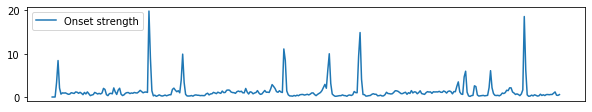

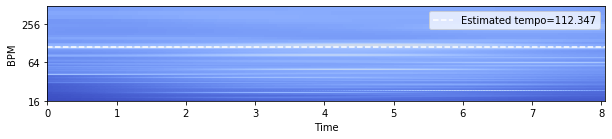

ValueError: ignored

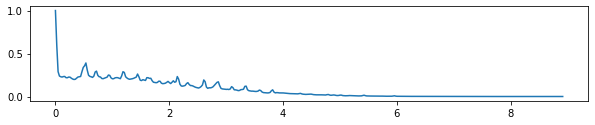

In [ ]:
generate_tempogram(path = 'Chair_Movement.wav')

In [ ]:
import os

In [ ]:
files = os.listdir('/content')[2:5]
files

['radio.wav', 'television.wav', 'shower.wav']

In [ ]:
for i in files:
  print(f'File Name : {i}')
  generate_tempogram(path = f'/content/{i}')
  print('-'*50)

NameError: ignored